# Evaluación Avanzada (macro/ micro F1, ROC y AUC en multiclase)

## Acuracy (limitaciones)
- Fácil de entender, pero puede ser engañoso en clases desbalanceadas.
- Ejemplo: si 90% de los datos son clase A, un modelo que siempre prediga A tendrá 90% accuracy, pero no servirá para detectar las demás clases.
Usamos precision, recall y F1 con diferentes formas de promedio (average).

## Tipos de promedio en multiclase
1. Macro average
    - Calcula la métrica (precision, recall o F1) por clase y luego hace el promedio simple.
    - Da igual importancia a todas las clases
2. Weighted average
    - Promedio ponderado según el número de ejemplos de cada clase.
    - Si hay desbalance, las clases grandes pesan más.
3. Micro average
    - Cuenta global de TP, FP y FN.
    - Útil cuando queremos una medida global de rendimiento y no enfocamos en clases individuales.

## ROC y AUC en multiclase
- ROC (Reciever Operating Characteristic): curva que muestra la relación entre TPR (recall)  y FPR (false positive rate).
  - Eje X = False Positive Rate (FPR).
  - Eje Y = True Positive Rate (TPR) = recall.
  - Muestra el trade-pff entre sensibilidad y especialidad.
- AUC (Area Under Curve): mide el área bajo la curva ROC -> valores cercanos a 1 indican buen modelo.
  - Área bajo la curva ROC.
  - 1.0 = modelo perfecto, 0.5 = modelo al azar.
Problema: ROC es fácil en binario (positvo/negativo), pero en multiclase tenemos que entenderlo:
1. OvR (One-vs-Rest): se traza una curva ROC para cada clase vs el resto
2. Macro/micro promedio: se pueden promediar las curvas AUC


## Ejemplo Guiado con Iris Dataset

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

AUC macro (OvR): 0.996
AUC micro (OvR): 0.996


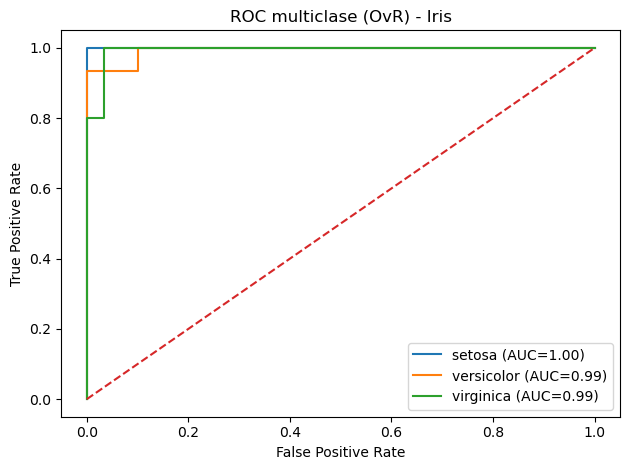

In [15]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# 1) Cargar dataset
iris = load_iris()
X, y = iris.data, iris.target
classes = np.unique(y)
n_classes = len(classes)

# 2) Train/test split -> y SE MANTIENE 1D
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 3) Entrenar modelo (y_train es 1D)
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
model.fit(X_train, y_train)

# 4) Reporte clásico
y_pred = model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 5) Para ROC/AUC multiclase:
#   - Binarizamos SOLO y_test para curvas OvR por clase
y_test_bin = label_binarize(y_test, classes=classes)       # shape (n_samples, n_classes)
y_score = model.predict_proba(X_test)                       # probabilidades por clase (softmax)

# 6) AUC macro / micro con API directa
auc_macro = roc_auc_score(y_test_bin, y_score, multi_class="ovr", average="macro")
auc_micro = roc_auc_score(y_test_bin, y_score, multi_class="ovr", average="micro")
print(f"AUC macro (OvR): {auc_macro:.3f}")
print(f"AUC micro (OvR): {auc_micro:.3f}")

# 7) Curvas ROC por clase
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 8) Graficar
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{iris.target_names[i]} (AUC={roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")  # diagonal azar
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC multiclase (OvR) - Iris")
plt.legend()
plt.tight_layout()
plt.show()


## Tarea - dataset wine
1. Entrena un modelo con `multi_class="multinomial` y `solver="lbfgs`.
2. Imprime el classification_report.
3. Calcula el ROC-AUC macro y micro (`roc_auc_score`).
4. Grafica las curvas ROC para las 3 clases.
5. Comenta: ¿qué primedio (macro o micro) refleja mejor el rendimiento en este dataset y por qué?

Reporte de clasificación:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

AUC macro (OvR): 0.998
AUC micro (OvR): 0.998


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


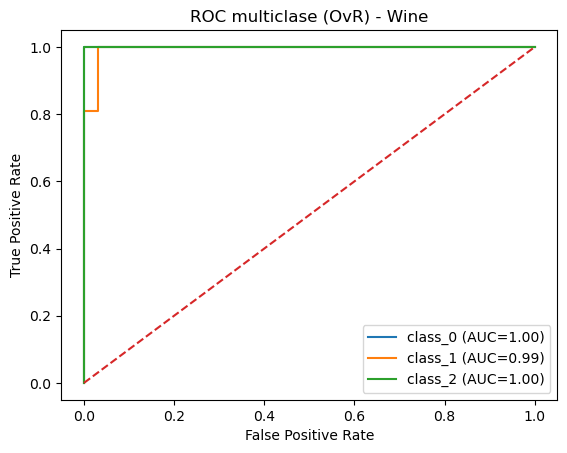

In [17]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

wine = load_wine()
X,y = wine.data, wine.target
classes = np.unique(y)
n_classes = len(classes)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

# 1.
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 2. 
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred,target_names=wine.target_names))

y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test)


# 3. 
auc_macro = roc_auc_score(y_test_bin, y_score, multi_class="ovr", average="macro")
auc_micro = roc_auc_score(y_test_bin, y_score, multi_class="ovr", average="micro")
print(f"AUC macro (OvR): {auc_macro:.3f}")
print(f"AUC micro (OvR): {auc_micro:.3f}")

# 4.
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{wine.target_names[i]} (AUC={roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC multiclase (OvR) - Wine")
plt.legend()
plt.show()

**Respuesta:** Macro promedia por clases en partes iguales, les da el mismo peso que a las mayoritarias, esto evita que una clase grande domine la métrica.